In [50]:
#import required library
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords
#import plotly.graph_objs as go
#from plotly import tools
import random
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
#import plotly.offline as py
#from plotly.offline import init_notebook_mode, iplot
#import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import re
import os
#function for random colour generation for graph
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [51]:
train = pd.read_csv('train.csv')#read csv file
train = train.dropna(axis='columns', how='all')
train.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [52]:
train['length'] = train['text'].str.len()#find length oh review
train.head()

,deceptive,hotel,polarity,source,text,length
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,572
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,286
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,1104
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,707
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,384


In [53]:
df1 = train[['text']]#extract text and labels
df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1600 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [54]:
df1


,text
0,We stayed for a one night getaway with family ...
1,Triple A rate with upgrade to view room was le...
2,This comes a little late as I'm finally catchi...
3,The Omni Chicago really delivers on all fronts...
4,I asked for a high floor away from the elevato...
...,...
1595,Problems started when I booked the InterContin...
1596,The Amalfi Hotel has a beautiful website and i...
1597,The Intercontinental Chicago Magnificent Mile ...
1598,"The Palmer House Hilton, while it looks good i..."


In [55]:
df1['text']=df1['text'].fillna("")
df1['cleaned_review'] = df1.text.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))#remove @ from text

C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df1.head()

,text,cleaned_review
0,We stayed for a one night getaway with family ...,We stayed for a one night getaway with family ...
1,Triple A rate with upgrade to view room was le...,Triple A rate with upgrade to view room was le...
2,This comes a little late as I'm finally catchi...,This comes a little late as I'm finally catchi...
3,The Omni Chicago really delivers on all fronts...,The Omni Chicago really delivers on all fronts...
4,I asked for a high floor away from the elevato...,I asked for a high floor away from the elevato...


In [57]:
def preprocess_text(sen):#remove all symbolic data 
    sentence = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ',sen) # Removing html tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) # Remove punctuations and numbers
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # Single character removal
    sentence = re.sub(r'\s+', ' ', sentence) # Removing multiple spaces
    sentence = sentence.replace("ain't", "am not").replace("aren't", "are not")
    sentence = ' '.join(text.lower() for text in sentence.split(' ')) # Lowering cases
    sw = stopwords.words('english')
    sentence = ' '.join(text for text in sentence.split() if text not in sw) #removing stopwords
    #sentence = ' '.join(text.lemmatize() for text in sentence.split()) #lemmatization
    return sentence

In [58]:
df1['cleaned_Text'] = df1.text.apply(preprocess_text)

C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df1['cleaned_Text'] = df1['cleaned_Text'].apply(nltk.word_tokenize)#tokenise text

C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
stemmer = PorterStemmer()
df1['cleaned_Text'] = df1['cleaned_Text'].apply(lambda x: [stemmer.stem(y) for y in x])#apply stemmer

C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df1['cleaned_Text']

0       [stay, one, night, getaway, famili, thursday, ...
1       [tripl, rate, upgrad, view, room, less, also, ...
2       [come, littl, late, final, catch, review, past...
3       [omni, chicago, realli, deliv, front, spacious...
4       [ask, high, floor, away, elev, got, room, plea...
                              ...                        
1595    [problem, start, book, intercontinent, chicago...
1596    [amalfi, hotel, beauti, websit, interior, deco...
1597    [intercontinent, chicago, magnific, mile, outs...
1598    [palmer, hous, hilton, look, good, pictur, out...
1599    [former, chicagoan, appal, amalfi, hotel, chic...
Name: cleaned_Text, Length: 1600, dtype: object

In [62]:
df1['cleaned_Text'] = df1['cleaned_Text'].apply(lambda x: ' '.join(x))#apply count vectoriser
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df1['cleaned_Text']);

C:\Users\vaish\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
transformer = TfidfTransformer().fit(counts)
counts = transformer.fit_transform(counts)

In [64]:
train.loc[train['polarity'] == 'positive', 'label'] = 0
train.loc[train['polarity'] == 'negative', 'label'] = 1
df1.isnull().any().any()
train.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
length       0
label        0
dtype: int64

In [65]:
X = df1['cleaned_Text']
Y = train['label']
Y=Y.replace((np.inf, -np.inf, np.NaN), False).reset_index(drop=True)

Y.isnull().sum()
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1595    1.0
1596    1.0
1597    1.0
1598    1.0
1599    1.0
Name: label, Length: 1600, dtype: float64

In [66]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
Y= label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=500) 

In [67]:
import pickle
cv = CountVectorizer()
#x = cv.fit_transform(X_train)
cv.fit(df1['cleaned_Text'].values)

import pickle

pickle.dump(cv, open("tfidf.pickle", "wb"))
with open('tfidf.pickle', 'rb') as fid:
    countV = pickle.load(fid)
x = countV.transform(X_train)
from sklearn.svm import SVC  
clf = SVC() 
#x = cv.transform(X_test)
clf.fit(x, y_train)
pickle.dump(clf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [68]:
x1 = cv.transform(X_test)
yp=clf.predict(x1)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yp))
a=float(metrics.accuracy_score(y_test, yp))

Accuracy: 0.9375


In [69]:
print("Precision:",metrics.precision_score(y_test, yp))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, yp))

Precision: 0.9324324324324325
Recall: 0.9324324324324325


In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y_train)
x1 = cv.transform(X_test)
yp=clf.predict(x1)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
b=float(metrics.accuracy_score(y_test, yp))
print("Accuracy:",metrics.accuracy_score(y_test, yp))
print("Precision:",metrics.precision_score(y_test, yp))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, yp))


Accuracy: 0.84375
Precision: 0.9016393442622951
Recall: 0.7432432432432432


In [71]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x, y_train)
x1 = cv.transform(X_test)
yp=clf.predict(x1)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?


c=float(metrics.accuracy_score(y_test, yp))
print("Accuracy:",metrics.accuracy_score(y_test, yp))
print("Precision:",metrics.precision_score(y_test, yp))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, yp))

Accuracy: 0.6
Precision: 1.0
Recall: 0.13513513513513514


In [72]:
X = df1['text']
y = train['label']
y=y.replace((np.inf, -np.inf, np.NaN), False).reset_index(drop=True)


In [73]:
from __future__ import print_function
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
#from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
  #  text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text
X = X.map(lambda a: clean_text(a))
def text_to_wordlist(text):    
    #Remove Special Characters
    text = re.sub(r'[^a-z\d ]', " ", text)
    text = re.sub(r'\d+', '_num_', text)    
    return(text)
X = X.map(lambda a: text_to_wordlist(a))

In [74]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [75]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer.fit_on_texts(X)
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
x_train = tokenizer.texts_to_sequences(X)
x_test = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(X)
vocab_size = len(word_index)
y_train=y
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
y_test=y
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 9340
Longest comment size: 795
Average comment size: 150.633125
Stdev of comment size: 88.63532607112344
Max comment size: 416


In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install keras==2.3.1
processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
print(processed_post_x_train[0])
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')
processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)
import tensorflow.keras.backend
from keras.models import Sequential, load_model
from keras.layers import GRU, Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.optimizers import Nadam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

[ 4  5  1  2  6  7  8  9 10  3 11 12  1  3 13 14 15  1  2 16 17 18 19]
x_train shape: (1, 23)
x_test shape: (1, 23)


In [28]:
import os
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [29]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))


model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
#model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 416, 100)          934100    
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 416, 60)           38640     
_________________________________________________________________
lstm_layer2 (LSTM)           (None, 416, 30)           10920     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 416, 128)          11648     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 138, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)             

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=32,verbose=1)
model.evaluate(processed_x_test,y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1600 samples, validate on 1600 samples
Epoch 1/15
1600/1600 [==============================] - 23s 15ms/step - loss: 16.2323 - accuracy: 0.6031 - val_loss: 10.5821 - val_accuracy: 0.5000
Epoch 2/15
1600/1600 [==============================] - 22s 14ms/step - loss: 7.2627 - accuracy: 0.7837 - val_loss: 4.8462 - val_accuracy: 0.7444
Epoch 3/15
1600/1600 [==============================] - 23s 14ms/step - loss: 3.3121 - accuracy: 0.8450 - val_loss: 2.2933 - val_accuracy: 0.9556
Epoch 4/15
1600/1600 [==============================] - 23s 14ms/step - loss: 1.6531 - accuracy: 0.8769 - val_loss: 1.2019 - val_accuracy: 0.9694
Epoch 5/15
1600/1600 [==============================] - 23s 15ms/step - loss: 0.9773 - accuracy: 0.8994 - val_loss: 0.7941 - val_accuracy: 0.9756
Epoch 6/15
1600/1600 [==============================] - 23s 15ms/step - loss: 0.6875 - accuracy: 0.9144 - val_loss: 0.5246 - 

[0.3331128203868866, 0.996874988079071]

1600/1600 [==============================] - 5s 3ms/step


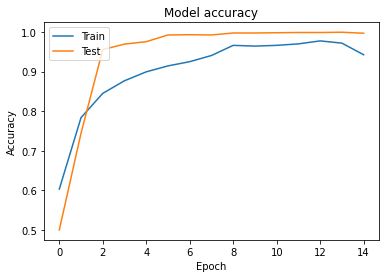

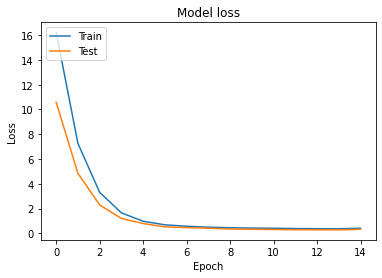

In [31]:
xx=model.evaluate(processed_x_test,y_test)# Plot training & validation accuracy values
d=float(xx[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

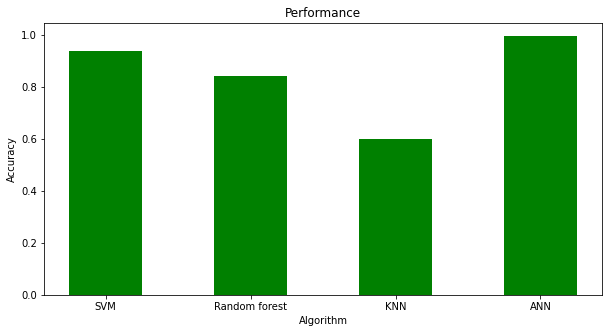

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'SVM':a, 'Random forest':b, 'KNN':c,'ANN':d}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Performance")
plt.show()

In [37]:
model_glove = Sequential()
model_glove.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(BatchNormalization())
model_glove.add(LSTM(100,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model_glove.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))

model_glove.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 416, 100)          934100    
_________________________________________________________________
dropout_5 (Dropout)          (None, 416, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 412, 64)           32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 103, 64)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 103, 64)           256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [38]:
model_glove.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model_glove.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=10,batch_size=32,verbose=1)

Train on 1600 samples, validate on 1600 samples
Epoch 1/10
1600/1600 [==============================] - 10s 6ms/step - loss: 2.4510 - accuracy: 0.6944 - val_loss: 1.7973 - val_accuracy: 0.6488
Epoch 2/10
1600/1600 [==============================] - 9s 6ms/step - loss: 1.1594 - accuracy: 0.9075 - val_loss: 0.9603 - val_accuracy: 0.9256
Epoch 3/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.7425 - accuracy: 0.9394 - val_loss: 0.6386 - val_accuracy: 0.9613
Epoch 4/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.5530 - accuracy: 0.9463 - val_loss: 0.7585 - val_accuracy: 0.7875
Epoch 5/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.4659 - accuracy: 0.9613 - val_loss: 0.4483 - val_accuracy: 0.9819
Epoch 6/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.3765 - accuracy: 0.9750 - val_loss: 0.7138 - val_accuracy: 0.7519
Epoch 7/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.3599 - ac

In [40]:
model_glove.save('my_model.h5') 

In [41]:
 from keras.models import load_model

In [42]:
model = load_model('my_model.h5')

In [47]:
X=['This keyboard is very easy to type on, but the fingerprint reader is the best feature. It is very accurate and simplifies login.']
#X = clean_text(X)
#X = text_to_wordlist(X)
print(X)
#a=[]
#a.append(X)
x_train = tokenizer.texts_to_sequences(X)
print(x_train)
prx_trainocessed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
print(prx_trainocessed_post_x_train)
print(max_len)

['This keyboard is very easy to type on, but the fingerprint reader is the best feature. It is very accurate and simplifies login.']
[[23, 18, 30, 433, 3, 758, 24, 26, 1, 4830, 18, 1, 133, 1343, 14, 18, 30, 2678, 2]]
[[  23   18   30  433    3  758   24   26    1 4830   18    1  133 1343
    14   18   30 2678    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  

In [44]:

a=model.predict_classes(prx_trainocessed_post_x_train, verbose=0)
print(a)

[[0]]


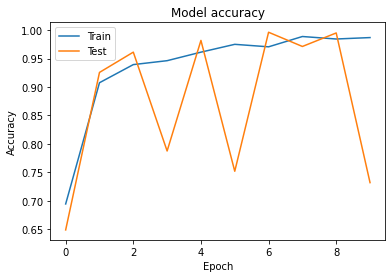

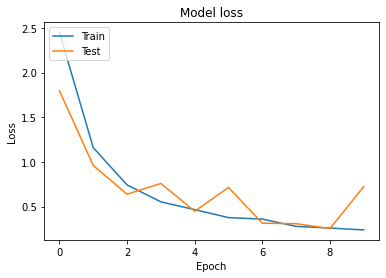

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 